In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import pandas as pd
import pylhe

In [2]:
ak.__version__

'1.7.0'

In [3]:
# import the root file
f_Att = uproot.open('/workspace/Att_400s/Events/run_01/tag_1_delphes_events.root')
f_ttW = uproot.open('/workspace/ttW/Events/run_01/tag_1_delphes_events.root')
f_ttZ = uproot.open('/workspace/ttZ/Events/run_01/tag_1_delphes_events.root')
f_tZj = uproot.open('/workspace/tZj/Events/run_01/tag_1_delphes_events.root')

f_Att.keys()

['ProcessID0;1', 'Delphes;1']

In [4]:
f_Att['Delphes;1'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint8_t[]                | AsJagged(AsDtype('uint8'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.ReadTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.ProcTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.MPI      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Scale    

In [5]:
# Define Trees
tree_particle_Att = f_Att['Delphes;1/Particle']
tree_electron_Att = f_Att['Delphes;1/Electron']
tree_muon_Att = f_Att['Delphes;1/Muon']
tree_jet_Att = f_Att['Delphes;1/Jet']
tree_Emiss_Att = f_Att['Delphes;1/MissingET']
tree_HT_Att = f_Att['Delphes;1/ScalarHT']

tree_particle_ttW = f_ttW['Delphes;1/Particle']
tree_electron_ttW = f_ttW['Delphes;1/Electron']
tree_muon_ttW = f_ttW['Delphes;1/Muon']
tree_jet_ttW = f_ttW['Delphes;1/Jet']
tree_Emiss_ttW = f_ttW['Delphes;1/MissingET']
tree_HT_ttW = f_ttW['Delphes;1/ScalarHT']

tree_particle_ttZ = f_ttZ['Delphes;1/Particle']
tree_electron_ttZ = f_ttZ['Delphes;1/Electron']
tree_muon_ttZ = f_ttZ['Delphes;1/Muon']
tree_jet_ttZ = f_ttZ['Delphes;1/Jet']
tree_Emiss_ttZ = f_ttZ['Delphes;1/MissingET']
tree_HT_ttZ = f_ttZ['Delphes;1/ScalarHT']

tree_particle_tZj = f_tZj['Delphes;1/Particle']
tree_electron_tZj = f_tZj['Delphes;1/Electron']
tree_muon_tZj = f_tZj['Delphes;1/Muon']
tree_jet_tZj = f_tZj['Delphes;1/Jet']
tree_Emiss_tZj = f_tZj['Delphes;1/MissingET']
tree_HT_tZj = f_tZj['Delphes;1/ScalarHT']

tree_jet_Att.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Jet                  | int32_t                  | AsDtype('>i4')                
Jet.fUniqueID        | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.fBits            | uint8_t[]                | AsJagged(AsDtype('uint8'))
Jet.PT               | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Eta              | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Phi              | float[]                  | AsJagged(AsDtype('>f4'))
Jet.T                | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Mass             | float[]                  | AsJagged(AsDtype('>f4'))
Jet.DeltaEta         | float[]                  | AsJagged(AsDtype('>f4'))
Jet.DeltaPhi         | float[]                  | AsJagged(AsDtype('>f4'))
Jet.Flavor           | uint32_t[]               | AsJagged(AsDtype('>u4'))
Jet.F

In [6]:
Att_particle = tree_particle_Att.arrays(['Particle.Mass'], library='ak')
Att_electron = tree_electron_Att.arrays(['Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
Att_muon = tree_muon_Att.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
Att_jet = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
Att_Emiss = tree_Emiss_Att.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
Att_HT = tree_HT_Att.arrays(['ScalarHT.HT'], library='ak')

ttW_particle = tree_particle_ttW.arrays(['Particle.Mass'])
ttW_electron = tree_electron_ttW.arrays(['Electron.PT',
                                         'Electron.T',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
ttW_muon = tree_muon_ttW.arrays(['Muon.PT',
                                 'Muon.T',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
ttW_jet = tree_jet_ttW.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
ttW_Emiss = tree_Emiss_ttW.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
ttW_HT = tree_HT_ttW.arrays(['ScalarHT.HT'], library='ak')

ttZ_particle = tree_particle_ttZ.arrays(['Particle.Mass'])
ttZ_electron = tree_electron_ttZ.arrays(['Electron.PT',
                                         'Electron.T',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
ttZ_muon = tree_muon_ttZ.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
ttZ_jet = tree_jet_ttZ.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
ttZ_Emiss = tree_Emiss_ttZ.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
ttZ_HT = tree_HT_ttZ.arrays(['ScalarHT.HT'], library='ak')

tZj_particle = tree_particle_tZj.arrays(['Particle.Mass'])
tZj_electron = tree_electron_tZj.arrays(['Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
tZj_muon = tree_muon_tZj.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
tZj_jet = tree_jet_tZj.arrays(['Jet.Mass',
                              'Jet.BTag',
                              'Jet.PT',
                              'Jet.Eta', 
                              'Jet.Phi',
                              'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
tZj_Emiss = tree_Emiss_tZj.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
tZj_HT = tree_HT_tZj.arrays(['ScalarHT.HT'], library='ak')

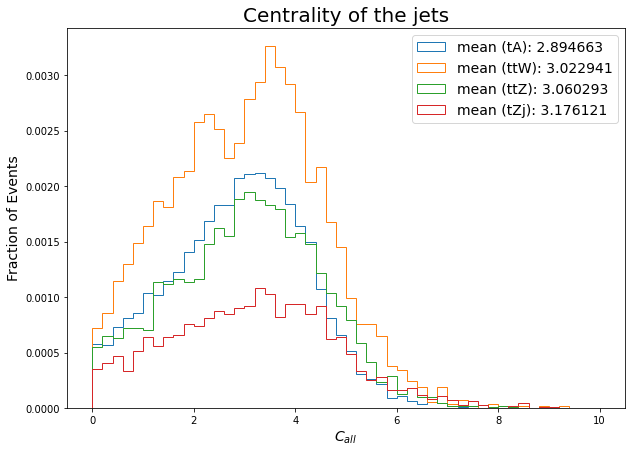

In [9]:
def f(m, pt, phi):
    return np.sqrt(m**2 + (pt/np.sin(phi)**2))

plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 51)
n = np.diff(bin)

m = []
for i in range(len(Att_jet['Jet.Mass'])):
    sumpt = np.sum(Att_jet['Jet.PT'][i])
    if sumpt==0:
        print(i)
    en = 0
    for j in range(len(Att_jet['Jet.Mass'][i])):
        en += f(Att_jet['Jet.Mass'][i][j], Att_jet['Jet.PT'][i][j], Att_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.02802, bins=bin, label='mean (tA): %f' %np.mean(m))

m = []
for i in range(len(ttW_jet['Jet.Mass'])):
    sumpt = np.sum(ttW_jet['Jet.PT'][i])
    en = 0
    for j in range(len(ttW_jet['Jet.Mass'][i])):
        en += f(ttW_jet['Jet.Mass'][i][j], ttW_jet['Jet.PT'][i][j], ttW_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.1059, bins=bin, label='mean (ttW): %f' %np.mean(m))


m = []
for i in range(len(ttZ_jet['Jet.Mass'])):
    sumpt = np.sum(ttZ_jet['Jet.PT'][i])
    en = 0
    for j in range(len(ttZ_jet['Jet.Mass'][i])):
        en += f(ttZ_jet['Jet.Mass'][i][j], ttZ_jet['Jet.PT'][i][j], ttZ_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.1298, bins=bin, label='mean (ttZ): %f' %np.mean(m))

m = []
for i in range(len(tZj_jet['Jet.Mass'])):
    sumpt = np.sum(tZj_jet['Jet.PT'][i])
    en = 0
    for j in range(len(tZj_jet['Jet.Mass'][i])):
        en += f(tZj_jet['Jet.Mass'][i][j], tZj_jet['Jet.PT'][i][j], tZj_jet['Jet.Phi'][i][j])
    m.append(sumpt/en)
l = len(m)
plt.hist(m, histtype='step', weights=np.ones(l)/l/m[0]*0.1275, bins=bin, label='mean (tZj): %f' %np.mean(m))

plt.xlabel(r'$C_{all}$', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Centrality of the jets', fontsize=20)
plt.legend(fontsize=14)
plt.show()

Area below the integral:  0.027963960000000433


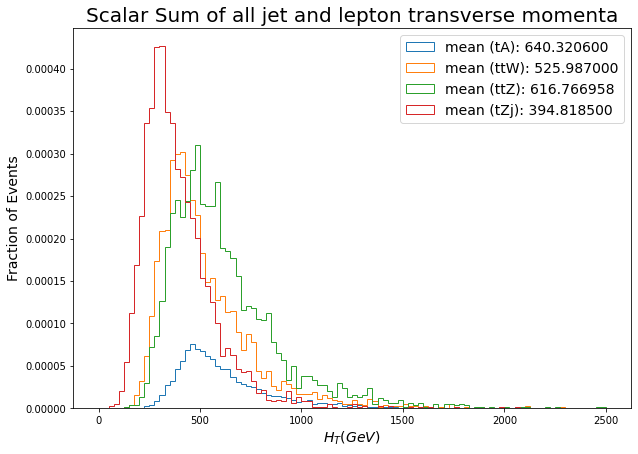

In [10]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 2500, 101)
m = np.diff(bin)
n, bins, patches = plt.hist(ak.flatten(Att_HT['ScalarHT.HT']), histtype='step', weights=np.ones(10000)/10000/m[0]*0.02802, bins=bin, label='mean (tA): %f' %ak.mean(Att_HT['ScalarHT.HT']))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
plt.hist(ak.flatten(ttW_HT['ScalarHT.HT']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1059, bins=bin, label='mean (ttW): %f' %ak.mean(ttW_HT['ScalarHT.HT']))
plt.hist(ak.flatten(ttZ_HT['ScalarHT.HT']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1298, bins=bin, label='mean (ttZ): %f' %ak.mean(ttZ_HT['ScalarHT.HT']))
plt.hist(ak.flatten(tZj_HT['ScalarHT.HT']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1275, bins=bin, label='mean (tZj): %f' %ak.mean(tZj_HT['ScalarHT.HT']))
plt.xlabel(r'$H_{T} (GeV)$', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Scalar Sum of all jet and lepton transverse momenta', fontsize=20)
plt.legend(fontsize=14)
plt.show()

Area below the integral:  0.028017198000003834


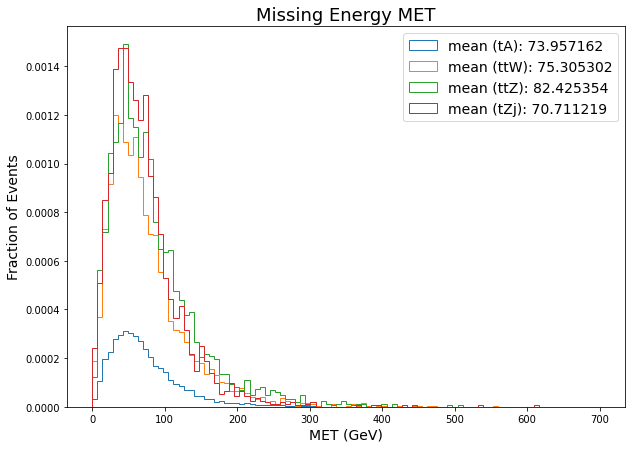

In [11]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 700, 101)
m = np.diff(bin)
n, bins, patches = plt.hist(ak.flatten(Att_Emiss['MissingET.MET']), histtype='step', weights=np.ones(10000)/10000/m[0]*0.02802, bins=bin, label='mean (tA): %f' %ak.mean(Att_Emiss['MissingET.MET']))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
plt.hist(ak.flatten(ttW_Emiss['MissingET.MET']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1059, bins=bin, label='mean (ttW): %f' %ak.mean(ttW_Emiss['MissingET.MET']))
plt.hist(ak.flatten(ttZ_Emiss['MissingET.MET']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1298, bins=bin, label='mean (ttZ): %f' %ak.mean(ttZ_Emiss['MissingET.MET']))
plt.hist(ak.flatten(tZj_Emiss['MissingET.MET']), histtype='step', weights=np.ones(3000)/3000/m[0]*0.1275, bins=bin, label='mean (tZj): %f' %ak.mean(tZj_Emiss['MissingET.MET']))
plt.xlabel('MET (GeV)', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Missing Energy MET', fontsize=18)
plt.legend(fontsize=14)
plt.show()

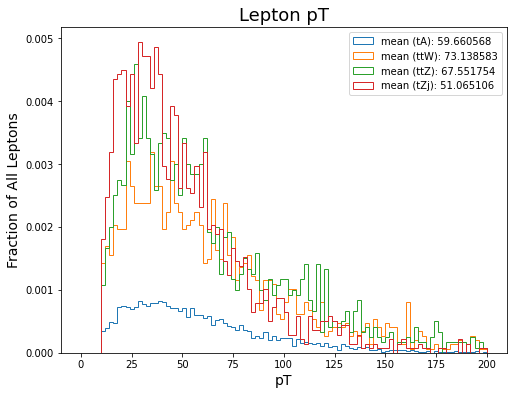

In [12]:
plt.figure(figsize=(8, 6))
m = np.concatenate((ak.to_numpy(ak.flatten(Att_muon['Muon.PT'])), ak.to_numpy(ak.flatten(Att_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.02802, label='mean (tA): %f' %ak.mean(m))
m = np.concatenate((ak.to_numpy(ak.flatten(ttW_muon['Muon.PT'])), ak.to_numpy(ak.flatten(ttW_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.1059, label='mean (ttW): %f' %ak.mean(m))
m = np.concatenate((ak.to_numpy(ak.flatten(ttZ_muon['Muon.PT'])), ak.to_numpy(ak.flatten(ttZ_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.1298, label='mean (ttZ): %f' %ak.mean(m))
m = np.concatenate((ak.to_numpy(ak.flatten(tZj_muon['Muon.PT'])), ak.to_numpy(ak.flatten(tZj_electron['Electron.PT']))), axis=None)
plt.hist(m, histtype='step', bins=np.linspace(0,200,101), weights=np.ones(len(m))/len(m)*0.1275, label='mean (tZj): %f' %ak.mean(m))
plt.xlabel('pT', fontsize=14)
plt.ylabel('Fraction of All Leptons', fontsize=14)
plt.title('Lepton pT', fontsize=18)
plt.legend()

In [15]:
Att_jet_ak = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
ttW_jet_ak = tree_jet_ttW.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
ttZ_jet_ak = tree_jet_ttZ.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
tZj_jet_ak = tree_jet_tZj.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')

Area below the integral:  0.027960086524125217
Area below the integral:  0.10564195906433141
Area below the integral:  0.12930207954774375
Area below the integral:  0.1274220183486308


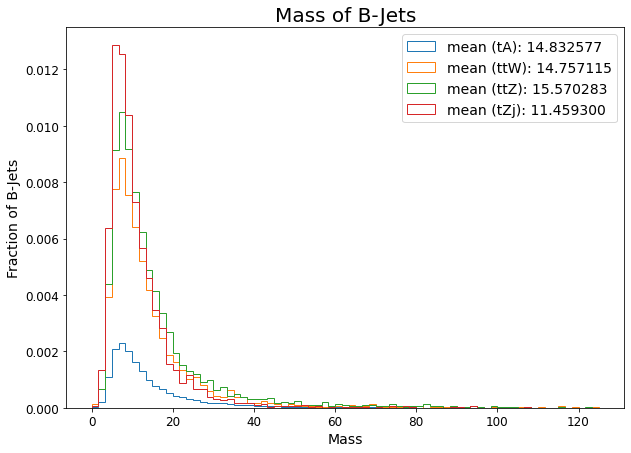

In [18]:
# testing
tagsize = 14
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 125, 76)
m = np.diff(bin)
m1 = ak.flatten(Att_jet_ak['Jet.Mass']*Att_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(Att_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(Att_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.02802, label='mean (tA): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.flatten(ttW_jet_ak['Jet.Mass']*ttW_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(ttW_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(ttW_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.1059, label='mean (ttW): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.flatten(ttZ_jet_ak['Jet.Mass']*ttZ_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(ttZ_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(ttZ_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.1298, label='mean (ttZ): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.flatten(tZj_jet_ak['Jet.Mass']*tZj_jet_ak['Jet.BTag'])
n, bins, patches = plt.hist(ak.flatten(tZj_jet_ak['Jet.Mass']), bins=bin, histtype='step', weights=ak.flatten(tZj_jet_ak['Jet.BTag'])/ak.count_nonzero(m1)/m[0]*0.1275, label='mean (tZj): %f' %(ak.sum(m1)/ak.count_nonzero(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))

plt.legend(fontsize=14)
plt.xlabel('Mass' , fontsize=14) 
plt.ylabel("Fraction of B-Jets", fontsize=14) 
plt.title('Mass of B-Jets', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


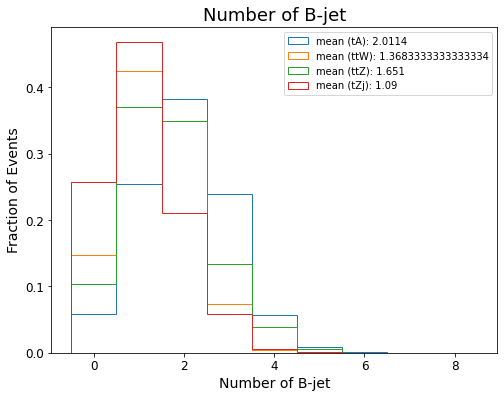

In [26]:
plt.figure(figsize=(8,6)) 
bin = np.linspace(-0.5, 8.5, 10)
print(bin)

num_bjet = ak.count_nonzero(Att_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (tA): {ak.mean(num_bjet)}')

num_bjet = ak.count_nonzero(ttW_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (ttW): {ak.mean(num_bjet)}')

num_bjet = ak.count_nonzero(ttZ_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (ttZ): {ak.mean(num_bjet)}')

num_bjet = ak.count_nonzero(tZj_jet_ak['Jet.BTag'], axis=-1)
plt.hist(num_bjet, bins=bin, histtype='step', density=True, label=f'mean (tZj): {ak.mean(num_bjet)}')

plt.legend()
plt.xlabel('Number of B-jet' , fontsize=14) 
plt.ylabel("Fraction of Events", fontsize=14) 
plt.title('Number of B-jet', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.
 13.5 14.  14.5 15.  15.5]


<Figure size 720x504 with 0 Axes>

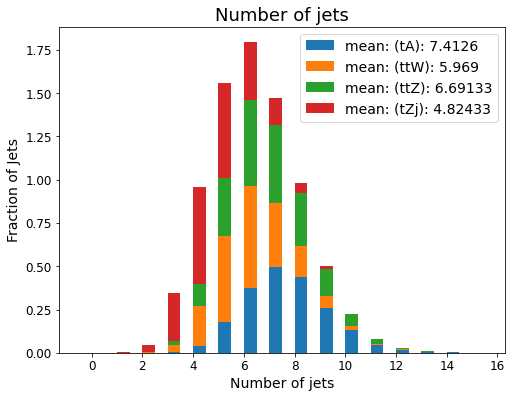

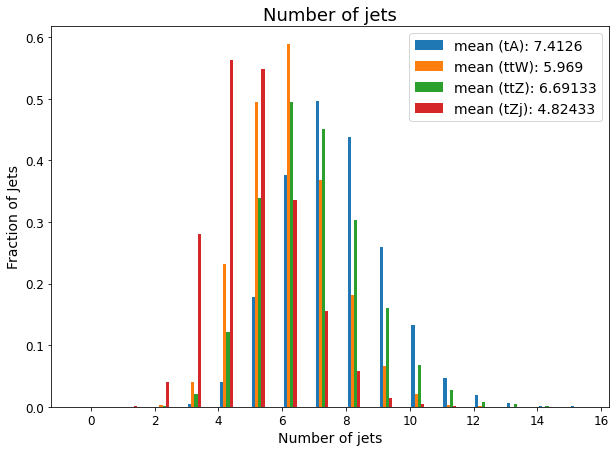

In [20]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 33)
print(bin)
m1, m2, m3, m4 = ak.num(Att_jet_ak['Jet.Mass']), ak.num(ttW_jet_ak['Jet.Mass']), ak.num(ttZ_jet_ak['Jet.Mass']), ak.num(tZj_jet_ak['Jet.Mass']) 
n = ['tA', 'ttW', 'ttZ', 'tZj']
# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=[f'mean: ({n[i-1]}): {round(ak.mean(a), 5)}']) for i, a in enumerate([m1, m2, m3, m4], 1)], axis=1)

# plot the data
df.plot.hist(stacked=True, bins=bin, density=True, figsize=(8, 6))

plt.legend(fontsize=14)
plt.xlabel('Number of jets' , fontsize=14) 
plt.ylabel("Fraction of Jets", fontsize=14) 
plt.title('Number of jets', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 33)
m1, m2, m3, m4 = ak.num(Att_jet_ak['Jet.Mass']), ak.num(ttW_jet_ak['Jet.Mass']), ak.num(ttZ_jet_ak['Jet.Mass']), ak.num(tZj_jet_ak['Jet.Mass']) 
n = ['tA', 'ttW', 'ttZ', 'tZj']

plt.hist([m1, m2, m3, m4], bins=bin, density=True, label=[f'mean (tA): {ak.mean(m1)}', f'mean (ttW): {ak.mean(m2)}', f'mean (ttZ): {round(ak.mean(m3), 5)}', f'mean (tZj): {round(ak.mean(m4), 5)}' ])

plt.legend(fontsize=14)
plt.xlabel('Number of jets' , fontsize=14) 
plt.ylabel("Fraction of Jets", fontsize=14) 
plt.title('Number of jets', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

Area below the integral:  0.027919128000001903
Area below the integral:  0.10582939999999656
Area below the integral:  0.12980000000000608
Area below the integral:  0.12750000000000772


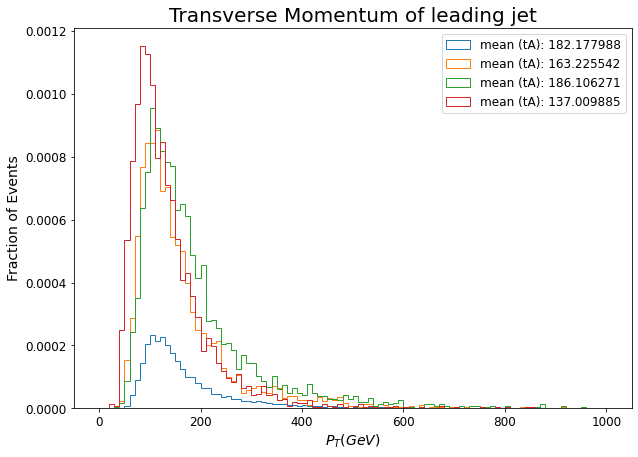

In [30]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 1000, 101)
m = np.diff(bin)
m1 = ak.max(Att_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(10000)/10000/m[0]*0.02802, label='mean (tA): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.max(ttW_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(3000)/3000/m[0]*0.1059, label='mean (tA): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.max(ttZ_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(3000)/3000/m[0]*0.1298, label='mean (tA): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
m1 = ak.max(tZj_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
n, bins, patches = plt.hist(m1, bins=bin, histtype='step', weights=np.ones(3000)/3000/m[0]*0.1275, label='mean (tA): %f' %(ak.mean(m1)))
print("Area below the integral: ", np.sum(n * np.diff(bins)))

plt.legend(fontsize=12)
plt.xlabel(r'$P_{T} (GeV)$' , fontsize=14) 
plt.ylabel("Fraction of Events", fontsize=14) 
plt.title('Transverse Momentum of leading jet', fontsize=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()